In [3]:
# conda install nbconvert==5.4.1

# Singular Value Decomposition (SVD)

<p>Singular value decompostion is an effective matrix decomposition method which is used on several business relevant situations like building recommendation system, semantic analysis, imputing missing values, compressing images etc. Like principal component analysis (PCA) it also extracts dimensions pointing towards the spread of the data. However, unlike PCA, it works on the original matrix rather than the correlation (or covariance) matrix. SVD decomposes the input matrix into three components comprising of the row space and column space of the data. This makes the outcome of SVD quite helpful in doing row-wise analysis or column-wise analysis. Before getting into the details of these, let us have a mathematical explanation of SVD.

</p> 
<p>Let us assume that a dataset (represented as a matrix) $D$ is having data points in $m$ dimensional feature space. Thus $D \in R^m$. As per SVD, $$D=U\small \Sigma V^T \\ $$ Where $U$ is the column space of $D$ and $V$ is the row space of $D$ and $\Sigma$ is a diagonal matrix consisting of the scaling factors called the <b>singular values</b>. We would now see how the above formula is coming into the existence.</p>
Let $D$ is an $n \times m$ matrix. We can get two square symmetric matrices through dot product, i.e. $D^TD_{m\times m}$ and $DD^T_{n\times n}$. Let us start with the square matrix $D^TD$.

Since $D^TD$ is a square symmetric matrix, it is possible to decompose the matrix using eigen decomposition method as shown below.

$$D^TDv_j=\lambda_j v_j$$
$$\begin{align}
&\implies DD^TDv_j=D\lambda_j v_j \\ 
&\implies (DD^T)Dv_j=\lambda_j Dv_j \\
\end{align} \\ $$

An interesting observation from the above expression is that both $D^TD$ and $DD^T$ have same set of non-zero eigenvalues. In the above equation, $\lambda_j$ is the eigenvalue and $v_j$ is one of the $m$ eigenvectors such that $v_j^Tv_j=1$. Thus we see that $Dv_j$ is an eigenvector of $DD^T$. However, for $Dv_j$ to be a proper eigenvector, $\lVert Dv_j\rVert_2$ should be 1. Now,

$$\begin{align}
\lVert Dv_j\rVert_2^2&=(Dv_j)^T(Dv_j) \\
&=v_j^TD^TDv_j \\
&=v_j^T\lambda_j v_j \\
&=\lambda_j v_j^Tv_j \\
&=\lambda_j\ \ \ \ \ [because\ v_j^Tv_j=1]
\end{align}$$
$$ \therefore \lVert Dv_j \rVert_2=\sqrt{\lambda_j}=\sigma_j\ \ \ \ \ [Singular\ value] $$
<br />
Let $u_j$ denotes the $j^{th}$ eigenvector of $DD^T$ matrix. Then $u_j=\frac{Dv_j}{\sigma_j}$, i.e. a unit vector along $Dv_j$. Now let us consider the following expressions:
$$\begin{align}
u_j^TDv_j&=\left( \frac{Dv_j}{\sigma_j} \right)^TDv_j \\
&=\frac{v_j^TD^TDv_j}{\sigma_j} \\
&=\frac{v_j^T\lambda_j v_j}{\sigma_j} \\ 
&=\frac{\lambda_j}{\sigma_j}v_j^Tv_j \\
&=\sigma_j\ \ \ \ \ [because\ \lambda_j=\sigma_j^2\ and\ v_j^Tv_j=1]
\end{align}$$

Now, as $DD^T$ is an $n\times n$ matrix, there will be $n$ eigenvectors for $DD^T$ matirx and as $D^TD$ is an $m\times m$ matrix, there will $m$ eigenvectors for $D^TD$ matrix. However, the number of singular values are restricted to the minimum of $n$ and $m$. Hence, if $n \ge m$, number of singular values will be $m$ and if $m \ge n$, number of singular values will be $n$. For understanding purpose, we can take the case when <b>$n \ge m$</b>. From the above expression we can write,

$$u_1^TDv_1=\sigma_1\\ $$
$$u_2^TDv_2=\sigma_2\\ $$
$$u_3^TDv_3=\sigma_3\\ $$
$$.$$
$$.$$
$$u_m^TDv_m=\sigma_m\\ $$
$$u_{m+1}^TDv_{m+1}=0\\ $$
$$u_{m+2}^TDv_{m+2}=0\\ $$
$$.$$
$$.$$
$$.$$
$$u_{n}^TDv_{n}=0$$

Note that $v_{m+1}$, $v_{m+2}$ etc are all null vectors because, the maximum dimension of $D^TD$ is $m$ and $v_j$ is associated with $D^TD$ matrix. All the above equations can be comfortably represented in a matrix format as
$$\ \\ U_{n\times n}^TD_{n\times m}V_{m\times n}=\Sigma_{n\times n}\\ $$

All the $n-m$ columns from $V$ matrix above contains $0$ values and they can be removed. Accodingly, the $n-m$ columns from the $\Sigma$ matrix will also be removed. Thus, the final expression turns out to be,

$$\ \\ U_{n\times n}^TD_{n\times m}V_{m\times m}=\Sigma_{n\times m}\\ $$

Here $U=[u_i]_{n\times n}$ is the left singular vector matrix, $V=[v_j]_{m\times m}$ is the right singular vetor matrix and $\Sigma$ is a diagonal matrix where the first $m$ diagonal elements are non-zero singular values and all the remaining elements are all zeros. Since each singular vector is a unit vector and they are perpendicular to each other, $U$ and $V$ are basically orthonomal in nature. For any orthonormal square matrix $X$, we know $X^{-1} = X^T$. Hence we get the following expressions,

$$\ \\ U^TDV=\Sigma\\ $$
$$\begin{align}
&\implies U^TDVV^T=\Sigma V^T\\ 
&\implies U^TDVV^{-1}=\Sigma V^T\\ 
&\implies U^TDI=\Sigma V^T\\ 
&\implies U^TD=\Sigma V^T\\ 
&\implies UU^TD=U\Sigma V^T\\
&\implies UU^{-1}D=U\Sigma V^T\\ 
&\implies ID=U\Sigma V^T\\
&\implies D=U\Sigma V^T\ \ \ \ [Hence\ the\ proof]\\
\end{align}\\ $$




# Truncated SVD

Full SVD is practically wastage of computer memory because, if number of rows is in millions (say $10^6$) and number of columns is (say) one thousand, at most one thousand non-zero singular values can be found out. That would mean, a large number of left singular vectors, i.e. $10^6-10^3$ number of left singular vectors will have no contribution towards the reconstruction of the original matrix. However, if full left singular matrix is extracted, lots of memory will be wasted just to store the singular vectors which are practically meaningless. Hence, instead of full SVD, truncated SVD is used. It is shown below:

$$\ \\ D=U_{n\times m}\Sigma_{m\times m}V^T_{m\times m}\ \ \ \ [when\ n\ge m]\\ $$
$$D=U_{n\times n}\Sigma_{n\times n}V^T_{n\times m}\ \ \ \ [when\ m\ge n]\\ $$
<br />

Pictorically SVD can also be understood as shown below.

<img src='https://intoli.com/blog/pca-and-svd/img/svd-matrices.png'>

Geometric interpretation of SVD can be understood by looking at the image below:

|![Figure 1](https://blogs.sas.com/content/iml/files/2017/08/svd1.png)|
|:--:|
|*Figure 1: Rotation and scaling in SVD*|

<h3><b>Low Rank Approximation</b></h3>
In almost all practical scenarios, it is seen that number of dimensions required to approximate the original matrix is much lesser than the number of columns (or rows). If $r$ is the number of dimensions, usually $r\ll m$. Hence, $$\ \\D\approx U_{n\times r}\Sigma_{r\times r}V^T_{r\times m} \ \ \ \ [rank\ of\ U\ and\ V\ is\ r\ll m,n]\\ $$ 

To determine the value of $r$, usually two methods are followed such as:
* Decided by the analyst based on his/her experience
* Decided by $\frac{\sum_{i=1}^r\sigma_i}{\sum_{i=1}^m\sigma_i}\ge\tau$ where $\tau$ is a threshold usually in the range $[0.5-0.8]$ (here $m\le n)$

In [ ]:
# Pythod code

# Python code on SVD

Image compression using SVD

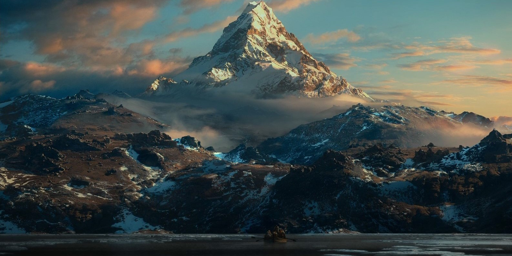

In [9]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

import requests
url = 'https://static.wikia.nocookie.net/lotr/images/e/e3/Lonely_Mountain_-_DoS.jpg/revision/latest?cb=20200317224945'
im = Image.open(requests.get(url, stream=True).raw)
im.resize((512,256))

In [ ]:
img = np.asarray(im.resize((512,256)))
img.shape

(256, 512, 3)

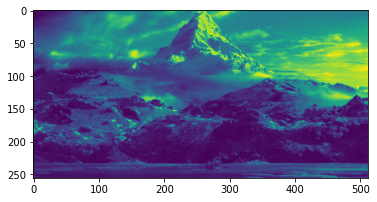

In [ ]:
plt.imshow(img[:,:,0])

In [ ]:
u0,s0,v_t0 = np.linalg.svd(a=img[:,:,0], full_matrices=False)

In [ ]:
img_recreated = np.zeros(shape=img.shape)
K = 100
for ch in range(3):
    img1 = img[:,:,ch]
    u,s,v_t = np.linalg.svd(a=img1, full_matrices=False)
    img2 = np.dot(np.dot(u[:,:K],np.diag(s[:K])),v_t[:K,:])
    img2_scaled = (img2-img2.min())/(img2.max()-img2.min())
    img_recreated[:,:,ch] = img2_scaled

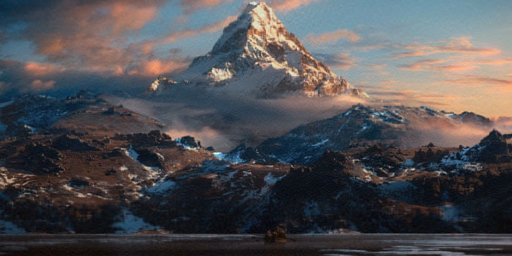

In [ ]:
Image.fromarray((img_recreated * 255).astype(np.uint8))

Original image size: $512\times 256 \times 3 = 393216\ pixels$

Decomposed matrices size: $(512+ 256)\times 100 \times 3 + 100\times 3 = 230700\ pixels$

Compression: $1 - \frac{230700}{393216}=41.33\%$